### Libraries and Configurations

In [53]:
import pandas as pd
pd.set_option('display.max_rows', None)   # Show all rows
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.width', None)      # Disable line wrapping
pd.set_option('display.max_colwidth', None) # Show long text fully

import re
import ast

import sqlite3

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Heiti TC'



In [4]:
#-----------Data Paths--------------
FILE_RESERVATION = "Reservation.csv"
FILE_UNORDERED = "UnorderedReservation.csv"

### Loading Data

In [5]:
df_reservation = pd.read_csv(FILE_RESERVATION)
df_unordered = pd.read_csv(FILE_UNORDERED)

/var/folders/48/q847vpdj211fy412ns8j2dnm0000gn/T/ipykernel_59036/2320227500.py:1: DtypeWarning: Columns (3,6,11,27,28,29,30,33,36,39,67) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reservation = pd.read_csv(FILE_RESERVATION)


In [77]:
df_unordered['newestStateTimes'].head(n = 20)

0                                                                           {'completedTime': None, 'dispatchingTime': None, 'pendingTime': Timestamp('2022-09-14 08:41:27.215000')}
1                                                                           {'completedTime': None, 'dispatchingTime': None, 'pendingTime': Timestamp('2022-09-15 01:42:37.177000')}
2                                        {'completedTime': None, 'dispatchingTime': Timestamp('2022-09-21 01:57:42.590000'), 'pendingTime': Timestamp('2022-09-15 05:59:00.218000')}
3                                                                           {'completedTime': None, 'dispatchingTime': None, 'pendingTime': Timestamp('2022-09-21 02:09:25.821000')}
4                                        {'completedTime': None, 'dispatchingTime': Timestamp('2022-09-21 02:18:53.578000'), 'pendingTime': Timestamp('2022-09-21 02:12:10.443000')}
5                                                                           {'completedTime': N

### Data Exploration

#### Basic Features categorization & filtering

In [6]:
reservation_cols = pd.DataFrame(df_reservation.columns.to_list(), columns=["reservation"])
unordered_cols = pd.DataFrame(df_reservation.columns.to_list(), columns=["unordered"])
cols_table = pd.concat([reservation_cols, unordered_cols], axis=1)

In [7]:
cols_table #發現：變數完全一樣 (但同變數內的value性質不同，如 "state")

,reservation,unordered
0,Unnamed: 0,Unnamed: 0
1,__v,__v
2,_id,_id
3,acceptanceCheckDeadline,acceptanceCheckDeadline
4,acceptanceNote,acceptanceNote
5,address,address
6,applyBookedSessionInfo,applyBookedSessionInfo
7,applyBookedSessionLogs,applyBookedSessionLogs
8,billProcessParticularStatus,billProcessParticularStatus
9,bookedSession,bookedSession


In [8]:
#確認訂單辨識欄位

print("Reservation Dataset")
print(f"Number of rows in dataset: {df_reservation.shape[0]}")
print(f"Number of unique values in [_id] column : {len(df_reservation['_id'].unique())}")

print("\n==\n")

print("UnorderedReservation Dataset")
print(f"Number of rows in dataset: {df_unordered.shape[0]}")
print(f"Number of unique values in [_id] column : {len(df_unordered['_id'].unique())}")

Reservation Dataset
Number of rows in dataset: 27813
Number of unique values in [_id] column : 27813

==

UnorderedReservation Dataset
Number of rows in dataset: 6233
Number of unique values in [_id] column : 6233


In [9]:
df_reservation.describe()

,Unnamed: 0,__v,customerAdvice,discountNum,originalTotal,sinyiReservationId,staffNumber,subtotal,total,totalDiff,travelingExpense,vatNo
count,27813.000000,27813.0,0.0,27813.000000,27813.000000,4.300000e+01,7125.000000,27813.000000,27813.000000,27813.000000,26038.000000,2.422000e+03
mean,13906.000000,0.0,NaN,-364.457017,3360.455219,2.022093e+09,369859.689404,3592.262036,3529.608564,306.520764,0.756587,3.483935e+07
std,8029.065855,0.0,NaN,817.210998,6865.841825,4.410026e+03,93117.521876,6604.339351,7125.829701,3672.814972,20.975092,2.336914e+07
min,0.000000,0.0,NaN,-16800.000000,0.000000,2.022090e+09,20439.000000,0.000000,0.000000,-234000.000000,0.000000,0.000000e+00
25%,6953.000000,0.0,NaN,-100.000000,0.000000,2.022090e+09,300829.000000,0.000000,0.000000,0.000000,0.000000,2.235494e+07
50%,13906.000000,0.0,NaN,0.000000,1800.000000,2.022090e+09,400079.000000,2300.000000,1800.000000,0.000000,0.000000,2.235494e+07
75%,20859.000000,0.0,NaN,0.000000,3600.000000,2.022095e+09,443504.000000,3600.000000,3600.000000,0.000000,0.000000,3.861883e+07
max,27812.000000,0.0,NaN,0.000000,260000.000000,2.022100e+09,908980.000000,260000.000000,184575.000000,176875.000000,800.000000,9.929968e+07


In [74]:
df_reservation.describe(exclude = ['int'])

,_id,acceptanceCheckDeadline,acceptanceNote,address,applyBookedSessionInfo,applyBookedSessionLogs,billProcessParticularStatus,bookedSession,cardConfirmedStatus,chatRoom,couponCode,createdAt,customerAdvice,customizations,defaultCardInfo,defaultPaymentMethod,disabled,discount,dispatching,email,envInfo,expectServiceTimes,guidePurchase,guidePurchaseRef,importLogFromCsv,intercom,isAssignedSpecificVenderForSelfConstructedBooking,isDirectlyBuild,isFinalReferralFeeNegative,isHasBill,isMinimumChargeUsing,isProcessReferralFeeFlag,isQuotationConfirmed,isRealUseCouponForPs1,isRenewBookedSession,isSelfBooking,isSendNewOrderNotify,isSendNotify,isServicePackageBooking,isStandard,isVisible,labels,memoImages,mode,moveInAddress,name,notes,notificationFrequency,objectNo,originRef,paymentStageSetting,paymentStatus,phone,processingImages,quotation,refReservations,referralFeeDiff,referralFeeInfo,referrer,renewBookedSessionLogs,reservationListMode,reservationNo,review,satisfySurvey,selfBookingInfo,serviceCapacity,serviceCharge,serviceClassification,serviceClassificationName,servicePackageInfo,services,sinyiReservationId,siteImages,staffNumber,state,stateLogs,stateTimes,travelingExpense,updatedAt,user,utm,valuationInfo,vatNo,vatTitle,vender,venderStaffs,vendersAssignedPriority,verificationPhone
count,27813,12,23636,27813,13,27813,27813,27813,437,927,9958,27813,0.0,27813,25467,27813,27813,7180,27813,21047,27813,24766,203,203,829,12361,16006,16006,27813,12347,18729,27813,27813,24263,27813,27813,16006,27813,27813,27813,27813,22014,27813,27813,27813,27813,27813,27813,1940,27813,27813,14956,27813,27813,6781,27813,27813,9735,3531,27182,27813,27813,27813,1796,19957,17581,27682,27813,27813,16667,27813,4.300000e+01,27813,7125.000000,27813,27813,27813,26038.000000,27813,27813,27813,17090,2.422000e+03,2420,27371,27813,22251,11577
unique,27813,12,10240,21882,13,14,2,13554,437,927,6100,19360,NaN,10055,2753,5,1,142,27086,13432,26451,4531,45,2,159,10194,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,31,203,4,6046,15140,27776,225,1848,6107,19714,1068,17754,6143,6781,2246,83,9735,2721,11809,1,27813,2607,1796,1063,218,10,38,52,609,27813,NaN,4209,NaN,12,27813,27813,NaN,4493,17796,385,1166,NaN,695,43,802,2,7603
top,{'oid': '61b849354b524200308101e2'},04:30.6,客戶備註：,"{'county': '新北市', 'details': '中正路455號23樓', 'district': '板橋區', 'fullAddress': '新北市板橋區中正路455號23樓', 'hasElevator': False}","{'bookedSession': {'from': Timestamp('2024-07-18 00:00:00'), 'to': Timestamp('2024-07-18 00:00:00')}, 'isConfirmed': False}",[],ban,"{""from"":""2025-02-07T04:00:00.000Z"",""to"":""2025-02-07T15:59:59.999Z""}","{'isOnStatus': False, 'isCardConfirmed': True, 'at': Timestamp('2022-01-04 03:17:06.027000')}",{'oid': '62de34812bbaba003036c2ae'},24MOVE1000,39:58.8,NaN,[],"{'spgatewayCardInfo': None, 'spgatewayCardToken': None, 'webUrl': ''}",cash,False,"{'title': '優惠碼-幸福季好禮五選一', 'value': -2500.0, 'conditionValue': 0.0, 'type': 'coupon', 'carryCondition': 'none', 'valueType': 'number', 'upperThreshold': 0.0, 'originalValue': -2500.0}","{'autoDispatchLogs': array([], dtype=float64), 'declineLogs': array([], dtype=float64), 'manuallyDispatchLogs': array([], dtype=float64), 'selfBookingLogs': array([], dtype=float64)}","b'W\x06\x8f!\xb7\xd6\xdb\xc5%\xee\xc1\xec\x84\x9d\xe1 \xaf\xd0""\xe1\x98\xa9\xf0\x84\xfa\x80,\xf7\xe4\xcd\x1d\x16'","{'appVersion': None, 'browserName': None, 'browserVersion': None, 'deviceModel': None, 'deviceType': 'web', 'origin': 'lsWeb', 'osName': None, 'osVersion': None, 'updatedAt': Timestamp('2022-04-29 07:04:15.203000'), 'userAgent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36'}",[],{'oid': '6265fb4ac4d7f7002f72b0a9'},Article,{'oid': '626b8defbb40580032352cd4'},"{'conversationId': None, 'lastError': None, 'userId': '611383445df9b58f8b9c4836'}",False,False,False,True,False,False,False,False,False,False,True,True,False,False,True,[],[],general,[],"b'\x0e\xec\x1b+}\xd6\x03*$;""\xb7\xc5\xdc\x1d\x0f'","[{'_id': {'oid': '64b

In [10]:
#---------------chatGPT 將欄位分大致分類 --------------

id_metadata_columns = [
    '_id', 'reservationNo', 'objectNo', 'sinyiReservationId', 
    'createdAt', 'updatedAt', '__v'
]

not_useful_columns = [
    '__v', 'Unnamed: 0', 'importLogFromCsv'
]

notes_columns = [
    'notes', 'customerAdvice'
]

client_info_columns = [
    'name', 'salutation', 'phone', 'email', 'vatNo', 
    'vatTitle', 'staffNumber', 'verificationPhone', 'referrer'
]

media_columns = [
    'siteImages', 'processingImages', 'memoImages'
]


#### 服務類型相關
service_details_columns = [
    'serviceClassification', 'serviceClassificationName', 'services', 
    'customizations', 'mode', 'serviceCapacity', 'serviceCharge', 
    'servicePackageInfo', 'isServicePackageBooking', 'quotation', 
    'isQuotationConfirmed', 'isStandard'
]

#### 時間地區相關
time_columns = [
    'bookedSession', 'expectServiceTimes', 'acceptanceCheckDeadline', 
    'renewBookedSessionLogs', 'stateTimes', 'applyBookedSessionInfo', 
    'applyBookedSessionLogs', 'valuationInfo'
]


#### 客戶地區、行為相關
client_info_columns = [
    'user', 'referrer'
]

address_columns = [
    'address', 'moveInAddress', 'intercom'
]

payment_columns = [
    'defaultPaymentMethod', 'paymentStageSetting', 'paymentStatus', 
    'subtotal', 'total', 'totalDiff', 'originalTotal', 'discount', 
    'discountNum', 'couponCode', 'originRef', 'travelingExpense', 
    'defaultCardInfo', 'cardConfirmedStatus', 'isRealUseCouponForPs1'
]


#### 訂單狀態相關
status_log_columns = [
    'state', 'stateLogs', 'dispatching', 'reservationListMode', 
    'isVisible', 'isSendNotify', 'isSendNewOrderNotify', 
    'isAssignedSpecificVenderForSelfConstructedBooking', 
    'isDirectlyBuild', 'isSelfBooking', 'isMinimumChargeUsing', 
    'isRenewBookedSession', 'review', 'acceptanceNote', 'acceptanceCriteriaChecklist'
]


tracking_columns = [
    'utm', 'envInfo', 'labels', 'guidePurchase', 'guidePurchaseRef', 
    'chatRoom', 'notificationFrequency', 'refReservations'
]

referral_billing_columns = [
    'referralFeeInfo', 'referralFeeDiff', 'totalReferralFee', 
    'isFinalReferralFeeNegative', 'isHasBill', 'isProcessReferralFeeFlag', 
    'billProcessParticularStatus'
]

In [11]:
#確認 user 可辨識客戶（可看出同客戶的多個訂單）
user_counts = df_unordered.groupby('user').size().reset_index(name='count')
user_counts.head()

,user,count
0,{'oid': '61123a6e4f9c510033917eac'},23
1,{'oid': '61133a399d771900315e8a8f'},3
2,{'oid': '61162f6b17caf000337325b0'},2
3,{'oid': '611b078f6c9fe90032fde990'},1
4,{'oid': '6122fe5f511a7100305af6b7'},2


In [12]:
df_unordered['defaultPaymentMethod'].tail()

6228    cash
6229    cash
6230    cash
6231    cash
6232    cash
Name: defaultPaymentMethod, dtype: object

In [15]:
###---------初步篩選出的變數 (有需要可再從上面加進來）－－－－－－－－－－－
cols_selected = [
    #訂單辨識
    '_id', 

    #客戶辨識
    'user', 
    
    #地址資訊
    "address", "moveInAddress",

    #時間資訊
    #'expectServiceTimes', #期待服務開始時間(包含起始與結束日期) (太多缺失值)
    'stateTimes', #包含訂單成立、報價、完成、取消等狀態的日期

    #referral
    'referrer',

    #服務產品資訊
    'serviceClassificationName', #服務類別
    "services", #服務方案、數量、價格
    "customizations", #客製化

    #付款方式
    'defaultPaymentMethod',

    #金額資訊
    'subtotal', #原始金額
    'total',
    'totalDiff',
    'originalTotal',
    'discountNum', #總折扣金額

    #訂單狀態
    "state"

]

In [16]:
df_rsv_simpl = df_reservation[cols_selected]

### Data Cleaning

In [17]:
#Functions for data cleaning

def show_before_after(old_obj, convertion_func):
    print(f"原本形式:\n'{str(old_obj)}'")
    print("===")
    print(f"變化後形式:\n'{convertion_func(old_obj)}'")


def fix_missing_commas(raw_string):
    """
    Fix missing commas between dictionaries in a list-like string.
    Example: [{...}{...}] ➝ [{...}, {...}]
    """
    # Insert a comma between '}{' only if they are not already separated
    fixed_string = re.sub(r'\}[\s]*\{', '}, {', raw_string)
    return fixed_string

def parse_json_like(str_val):
    """
    將 string 讀成 Python 物件
    """
    try:
        str_val = fix_missing_commas(str_val)

        if "Timestamp(" in str_val:
            str_val = str_val.replace("Timestamp(", "")
            str_val = str_val.replace(")", "")

        return ast.literal_eval(str_val)
    except Exception as e:
        print(str_val)
        print(f"Error parsing services : {e}")
        return []
    
def get_val_from_json_like(df_real, col, key):
    """"""
    df = df_real.copy()
    
    get_main = lambda x: x if type(x) == type(dict()) or x == [] else x[0]
    extract_func = lambda x: x.get(key) if type(x) == type(dict()) else None

    df[col] = df[col].apply(parse_json_like).apply(get_main)
    show_before_after(df[col][0], extract_func)
    
    df[col] = df[col].apply(extract_func)
    return df[col]


In [18]:
#確認目前所選欄位內容
print(df_rsv_simpl.columns)
df_rsv_simpl.head()

#不需處理欄位：'defaultPaymentMethod', 'subtotal', 'discountNum', 'state'
#需處理欄位：'_id', 'user', 'address', 'moveInAddress', 'stateTimes'
#需獨立成附表欄位 (key: '_id') ：'services', 'customizations'

Index(['_id', 'user', 'address', 'moveInAddress', 'stateTimes', 'referrer',
       'serviceClassificationName', 'services', 'customizations',
       'defaultPaymentMethod', 'subtotal', 'total', 'totalDiff',
       'originalTotal', 'discountNum', 'state'],
      dtype='object')


,_id,user,address,moveInAddress,stateTimes,referrer,serviceClassificationName,services,customizations,defaultPaymentMethod,subtotal,total,totalDiff,originalTotal,discountNum,state
0,{'oid': '61b849354b524200308101e2'},{'oid': '61b8492a4b524200308101e1'},"{'county': '高雄市', 'details': '民享街 １３６號', 'district': '苓雅區', 'fullAddress': '高雄市苓雅區民享街 １３６號', 'hasElevator': None}",[],"{'acceptanceCheckedTime': None, 'acceptedTime': Timestamp('2021-12-14 16:34:46.873000'), 'cancelledTime': Timestamp('2022-05-08 16:24:13.566000'), 'completedTime': None, 'deniedTime': None, 'dispatchedTime': Timestamp('2021-12-14 07:35:26.412000'), 'dispatchingTime': Timestamp('2021-12-14 07:35:17.269000'), 'establishedTime': Timestamp('2021-12-14 16:34:46.886000'), 'pending-ps1Time': None, 'pending-ps3Time': None, 'processedTime': None, 'processingTime': None, 'quotationConfirmedTime': None, 'quotingTime': None, 'staffArrivedTime': None, 'staffAssignedTime': Timestamp('2021-12-14 16:35:00.739000')}",NaN,居家客服專用管道,"[{'_id': {'oid': '61b849354b524200308101e3'}, 'basicPrice': 4000, 'count': 1, 'minimumCharge': None, 'price': 4000, 'serviceId': {'oid': '6181dc936989d500300ad820'}}]",[],cash,4000,4000,0,4000,0,cancelled
1,{'oid': '61b849ba4b524200308101ed'},{'oid': '616a300b4f6bcb00312d59f6'},"{'county': '高雄市', 'details': '金門街 ９５號１２樓', 'district': '苓雅區', 'fullAddress': '高雄市苓雅區金門街 ９５號１２樓', 'hasElevator': None}",[],"{'acceptanceCheckedTime': Timestamp('2022-01-08 13:16:33.648000'), 'acceptedTime': Timestamp('2021-12-14 16:49:29.691000'), 'cancelledTime': None, 'completedTime': Timestamp('2022-01-08 13:16:39.626000'), 'deniedTime': None, 'dispatchedTime': Timestamp('2021-12-14 07:37:36.992000'), 'dispatchingTime': Timestamp('2021-12-14 07:37:30.419000'), 'establishedTime': Timestamp('2021-12-14 16:49:29.705000'), 'pending-ps1Time': None, 'pending-ps3Time': Timestamp('2022-01-08 13:16:33.660000'), 'processedTime': Timestamp('2022-01-08 13:16:33.633000'), 'processingTime': Timestamp('2022-01-08 13:16:31.028000'), 'quotationConfirmedTime': None, 'quotingTime': None, 'staffArrivedTime': None, 'staffAssignedTime': Timestamp('2021-12-15 07:19:31.206000')}",NaN,居家客服專用管道,"[{'_id': {'oid': '61b849ba4b524200308101ee'}, 'basicPrice': 4000, 'count': 1, 'minimumCharge': None, 'price': 4000, 'serviceId': {'oid': '6181dc936989d500300ad820'}}]",[],cash,4000,4000,0,4000,0,completed
2,{'oid': '61b84a734b524200308101f8'},{'oid': '61b849264b524200308101df'},"{'county': '新北市', 'details': '二十張路46-10號5F', 'district': '新店區', 'fullAddress': '新北市新店區二十張路46-10號5F', 'hasElevator': None}","[{'county': '臺北市', 'details': '虎林街232巷60號2F', 'district': '信義區', 'fullAddress': '臺北市信義區虎林街232巷60號2F', 'hasElevator': None, 'type': 'main'}]","{'acceptanceCheckedTime': Timestamp('2022-01-17 03:01:45.818000'), 'acceptedTime': Timestamp('2021-12-14 08:55:20.033000'), 'cancelledTime': None, 'completedTime': Timestamp('2022-01-17 03:05:00.974000'), 'deniedTime': None, 'dispatchedTime': Timestamp('2021-12-14 07:45:35.268000'), 'dispatchingTime': Timestamp('2021-12-14 07:40:35.223000'), 'establishedTime': Timestamp('2022-01-17 03:00:40.474000'), 'pending-ps1Time': None, 'pending-ps3Time': Timestamp('2022-01-17 03:01:45.831000'), 'processedTime': Timestamp('2022-01-17 03:01:45.805000'), 'processingTime': Timestamp('2022-01-17 03:01:28.568000'), 'quotationConfirmedTime': None, 'quotingTime': None, 'staffArrivedTime': Timestamp('2022-01-17 03:01:05.605000'), 'staffAssignedTime': Timestamp('2022-01-17 03:01:00.088000')}",NaN,優質搬家,"[{'_id': {'oid': '61b84a734b524200308101fb'}, 'basicPrice': 0, 'count': 1, 'minimumCharge': None, 'price': 0, 'serviceId': {'oid': '611325eb6ec84b0032f28e8b'}}]","[{'_id': {'oid': '61b84a734b524200308101f9'}, 'addCost': 0, 'count': 1, 'customizationId': None, 'customizedValue': None, 'expandedItem': None, 'itemId': {'oid': '615297ab48781900308dbb53'}, 'name': '配送到遷出地址(下一頁填寫)', 'subtotal': 0, 'title': '紙箱配送(含加購及贈送)'}\n {'_id': {'oid': '61b84a734b524200308101fa'}, 'addCost': 0, 'count': 1, 'custom

##### 處理一維度資料 (根據資料類型處理)

In [19]:
df_rsv_simpl["user"] = get_val_from_json_like(df_rsv_simpl, "user", "oid")
df_rsv_simpl["order_id"] = get_val_from_json_like(df_rsv_simpl, "_id", "oid")
df_rsv_simpl["county"] = get_val_from_json_like(df_rsv_simpl, "address", "county")
df_rsv_simpl["elevator"] = get_val_from_json_like(df_rsv_simpl, "address", "hasElevator")
df_rsv_simpl["moveIncounty"] = get_val_from_json_like(df_rsv_simpl, "moveInAddress", "county")
df_rsv_simpl["moveInelevator"] = get_val_from_json_like(df_rsv_simpl, "moveInAddress", "hasElevator")

df_rsv_simpl.drop(['_id', 'address', "moveInAddress"], axis = 1, inplace=True)

原本形式:
'{'oid': '61b8492a4b524200308101e1'}'
===
變化後形式:
'61b8492a4b524200308101e1'
原本形式:
'{'oid': '61b849354b524200308101e2'}'
===
變化後形式:
'61b849354b524200308101e2'


/var/folders/48/q847vpdj211fy412ns8j2dnm0000gn/T/ipykernel_59036/1810416926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rsv_simpl["user"] = get_val_from_json_like(df_rsv_simpl, "user", "oid")
/var/folders/48/q847vpdj211fy412ns8j2dnm0000gn/T/ipykernel_59036/1810416926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rsv_simpl["order_id"] = get_val_from_json_like(df_rsv_simpl, "_id", "oid")


原本形式:
'{'county': '高雄市', 'details': '民享街   １３６號', 'district': '苓雅區', 'fullAddress': '高雄市苓雅區民享街   １３６號', 'hasElevator': None}'
===
變化後形式:
'高雄市'


/var/folders/48/q847vpdj211fy412ns8j2dnm0000gn/T/ipykernel_59036/1810416926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rsv_simpl["county"] = get_val_from_json_like(df_rsv_simpl, "address", "county")


原本形式:
'{'county': '高雄市', 'details': '民享街   １３６號', 'district': '苓雅區', 'fullAddress': '高雄市苓雅區民享街   １３６號', 'hasElevator': None}'
===
變化後形式:
'None'
原本形式:
'[]'
===
變化後形式:
'None'


/var/folders/48/q847vpdj211fy412ns8j2dnm0000gn/T/ipykernel_59036/1810416926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rsv_simpl["elevator"] = get_val_from_json_like(df_rsv_simpl, "address", "hasElevator")
/var/folders/48/q847vpdj211fy412ns8j2dnm0000gn/T/ipykernel_59036/1810416926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rsv_simpl["moveIncounty"] = get_val_from_json_like(df_rsv_simpl, "moveInAddress", "county")


原本形式:
'[]'
===
變化後形式:
'None'


/var/folders/48/q847vpdj211fy412ns8j2dnm0000gn/T/ipykernel_59036/1810416926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rsv_simpl["moveInelevator"] = get_val_from_json_like(df_rsv_simpl, "moveInAddress", "hasElevator")
/var/folders/48/q847vpdj211fy412ns8j2dnm0000gn/T/ipykernel_59036/1810416926.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rsv_simpl.drop(['_id', 'address', "moveInAddress"], axis = 1, inplace=True)


In [20]:
#處理時間資料
df_rsv_simpl["stateTimes"] = df_rsv_simpl["stateTimes"].apply(parse_json_like)
df_times = df_rsv_simpl["stateTimes"].apply(lambda x: pd.Series(x))
df_rsv_simpl = pd.concat([df_rsv_simpl, df_times], axis =1 )

df_rsv_simpl.drop(['stateTimes'], axis=1, inplace=True)

/var/folders/48/q847vpdj211fy412ns8j2dnm0000gn/T/ipykernel_59036/1160330757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rsv_simpl["stateTimes"] = df_rsv_simpl["stateTimes"].apply(parse_json_like)


In [21]:
#服務類型
df_rsv_simpl.groupby(['serviceClassificationName']).size().reset_index(name = "count").sort_values(["count"], ascending=False).head()
#Q:信義幸福季 好禮五選一是什麼？

,serviceClassificationName,count
12,優質搬家,5136
9,信義幸福季 好禮五選一,3814
23,居家清潔,2500
37,洗衣機清潔,1983
19,大掃除、裝潢後細清,1894


In [22]:
#付款方式類型
df_rsv_simpl.groupby(['defaultPaymentMethod']).size().reset_index(name = "count").sort_values(["count"], ascending=False)

,defaultPaymentMethod,count
4,cash,19084
3,card,4363
1,bankTransfer,4234
0,applePay,77
2,branchBudget,55


##### 處理多維度資料（方式：獨立成一個新dataframe，以order_id 為 mapping key)

處理 'services' 欄位

In [23]:
df_rsv_simpl[['services']].head() #可看出一個訂單可能有多個服務商品

,services
0,"[{'_id': {'oid': '61b849354b524200308101e3'}, 'basicPrice': 4000, 'count': 1, 'minimumCharge': None, 'price': 4000, 'serviceId': {'oid': '6181dc936989d500300ad820'}}]"
1,"[{'_id': {'oid': '61b849ba4b524200308101ee'}, 'basicPrice': 4000, 'count': 1, 'minimumCharge': None, 'price': 4000, 'serviceId': {'oid': '6181dc936989d500300ad820'}}]"
2,"[{'_id': {'oid': '61b84a734b524200308101fb'}, 'basicPrice': 0, 'count': 1, 'minimumCharge': None, 'price': 0, 'serviceId': {'oid': '611325eb6ec84b0032f28e8b'}}]"
3,"[{'_id': {'oid': '61b84e48f7469b003855eb42'}, 'basicPrice': 4000, 'count': 1, 'minimumCharge': None, 'price': 4000, 'serviceId': {'oid': '6181dc936989d500300ad820'}}]"
4,"[{'_id': {'oid': '61b852794b52420030810210'}, 'basicPrice': 4000, 'count': 1, 'minimumCharge': None, 'price': 4000, 'serviceId': {'oid': '6181dc936989d500300ad820'}}]"


In [24]:
#Parse 'service' from str >> list of dicts
df_services = df_rsv_simpl[['order_id', 'services']]
df_services['services'] = df_services['services'].apply(parse_json_like)

#Explode
df_services = df_services.explode('services')
df_services.head()

/var/folders/48/q847vpdj211fy412ns8j2dnm0000gn/T/ipykernel_59036/665792980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_services['services'] = df_services['services'].apply(parse_json_like)


,order_id,services
0,61b849354b524200308101e2,"{'_id': {'oid': '61b849354b524200308101e3'}, 'basicPrice': 4000, 'count': 1, 'minimumCharge': None, 'price': 4000, 'serviceId': {'oid': '6181dc936989d500300ad820'}}"
1,61b849ba4b524200308101ed,"{'_id': {'oid': '61b849ba4b524200308101ee'}, 'basicPrice': 4000, 'count': 1, 'minimumCharge': None, 'price': 4000, 'serviceId': {'oid': '6181dc936989d500300ad820'}}"
2,61b84a734b524200308101f8,"{'_id': {'oid': '61b84a734b524200308101fb'}, 'basicPrice': 0, 'count': 1, 'minimumCharge': None, 'price': 0, 'serviceId': {'oid': '611325eb6ec84b0032f28e8b'}}"
3,61b84e48f7469b003855eb41,"{'_id': {'oid': '61b84e48f7469b003855eb42'}, 'basicPrice': 4000, 'count': 1, 'minimumCharge': None, 'price': 4000, 'serviceId': {'oid': '6181dc936989d500300ad820'}}"
4,61b852794b5242003081020f,"{'_id': {'oid': '61b852794b52420030810210'}, 'basicPrice': 4000, 'count': 1, 'minimumCharge': None, 'price': 4000, 'serviceId': {'oid': '6181dc936989d500300ad820'}}"


In [25]:
df_services_info = df_services["services"].apply(lambda x: pd.Series(x))
df_services_expanded = pd.concat([df_services, df_services_info], axis = 1)
df_services_expanded.head()

,order_id,services,_id,basicPrice,count,minimumCharge,price,serviceId
0,61b849354b524200308101e2,"{'_id': {'oid': '61b849354b524200308101e3'}, 'basicPrice': 4000, 'count': 1, 'minimumCharge': None, 'price': 4000, 'serviceId': {'oid': '6181dc936989d500300ad820'}}",{'oid': '61b849354b524200308101e3'},4000,1,NaN,4000,{'oid': '6181dc936989d500300ad820'}
1,61b849ba4b524200308101ed,"{'_id': {'oid': '61b849ba4b524200308101ee'}, 'basicPrice': 4000, 'count': 1, 'minimumCharge': None, 'price': 4000, 'serviceId': {'oid': '6181dc936989d500300ad820'}}",{'oid': '61b849ba4b524200308101ee'},4000,1,NaN,4000,{'oid': '6181dc936989d500300ad820'}
2,61b84a734b524200308101f8,"{'_id': {'oid': '61b84a734b524200308101fb'}, 'basicPrice': 0, 'count': 1, 'minimumCharge': None, 'price': 0, 'serviceId': {'oid': '611325eb6ec84b0032f28e8b'}}",{'oid': '61b84a734b524200308101fb'},0,1,NaN,0,{'oid': '611325eb6ec84b0032f28e8b'}
3,61b84e48f7469b003855eb41,"{'_id': {'oid': '61b84e48f7469b003855eb42'}, 'basicPrice': 4000, 'count': 1, 'minimumCharge': None, 'price': 4000, 'serviceId': {'oid': '6181dc936989d500300ad820'}}",{'oid': '61b84e48f7469b003855eb42'},4000,1,NaN,4000,{'oid': '6181dc936989d500300ad820'}
4,61b852794b5242003081020f,"{'_id': {'oid': '61b852794b52420030810210'}, 'basicPrice': 4000, 'count': 1, 'minimumCharge': None, 'price': 4000, 'serviceId': {'oid': '6181dc936989d500300ad820'}}",{'oid': '61b852794b52420030810210'},4000,1,NaN,4000,{'oid': '6181dc936989d500300ad820'}


In [26]:
df_services_expanded['_id'] = df_services_expanded['_id'].apply(lambda x: x.get('oid'))
df_services_expanded['serviceId'] = df_services_expanded['serviceId'].apply(lambda x: x.get('oid'))
df_services_expanded.head()

,order_id,services,_id,basicPrice,count,minimumCharge,price,serviceId
0,61b849354b524200308101e2,"{'_id': {'oid': '61b849354b524200308101e3'}, 'basicPrice': 4000, 'count': 1, 'minimumCharge': None, 'price': 4000, 'serviceId': {'oid': '6181dc936989d500300ad820'}}",61b849354b524200308101e3,4000,1,NaN,4000,6181dc936989d500300ad820
1,61b849ba4b524200308101ed,"{'_id': {'oid': '61b849ba4b524200308101ee'}, 'basicPrice': 4000, 'count': 1, 'minimumCharge': None, 'price': 4000, 'serviceId': {'oid': '6181dc936989d500300ad820'}}",61b849ba4b524200308101ee,4000,1,NaN,4000,6181dc936989d500300ad820
2,61b84a734b524200308101f8,"{'_id': {'oid': '61b84a734b524200308101fb'}, 'basicPrice': 0, 'count': 1, 'minimumCharge': None, 'price': 0, 'serviceId': {'oid': '611325eb6ec84b0032f28e8b'}}",61b84a734b524200308101fb,0,1,NaN,0,611325eb6ec84b0032f28e8b
3,61b84e48f7469b003855eb41,"{'_id': {'oid': '61b84e48f7469b003855eb42'}, 'basicPrice': 4000, 'count': 1, 'minimumCharge': None, 'price': 4000, 'serviceId': {'oid': '6181dc936989d500300ad820'}}",61b84e48f7469b003855eb42,4000,1,NaN,4000,6181dc936989d500300ad820
4,61b852794b5242003081020f,"{'_id': {'oid': '61b852794b52420030810210'}, 'basicPrice': 4000, 'count': 1, 'minimumCharge': None, 'price': 4000, 'serviceId': {'oid': '6181dc936989d500300ad820'}}",61b852794b52420030810210,4000,1,NaN,4000,6181dc936989d500300ad820


In [27]:
df_services_expanded.drop(['services'], axis = 1, inplace = True)
df_services_expanded.head()

,order_id,_id,basicPrice,count,minimumCharge,price,serviceId
0,61b849354b524200308101e2,61b849354b524200308101e3,4000,1,NaN,4000,6181dc936989d500300ad820
1,61b849ba4b524200308101ed,61b849ba4b524200308101ee,4000,1,NaN,4000,6181dc936989d500300ad820
2,61b84a734b524200308101f8,61b84a734b524200308101fb,0,1,NaN,0,611325eb6ec84b0032f28e8b
3,61b84e48f7469b003855eb41,61b84e48f7469b003855eb42,4000,1,NaN,4000,6181dc936989d500300ad820
4,61b852794b5242003081020f,61b852794b52420030810210,4000,1,NaN,4000,6181dc936989d500300ad820


處理 'customizations' 欄位

In [28]:
df_rsv_simpl['customizations'].head() #可看出一個訂單可能有多個客製化

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        []
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [29]:
#Parse 'service' from str >> list of dicts
df_cust = df_rsv_simpl[['order_id', 'customizations']]
df_cust['customizations'] = df_cust['customizations'].apply(parse_json_like)

#Explode
df_cust = df_cust.explode('customizations')
df_cust.head()

/var/folders/48/q847vpdj211fy412ns8j2dnm0000gn/T/ipykernel_59036/765432672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cust['customizations'] = df_cust['customizations'].apply(parse_json_like)


,order_id,customizations
0,61b849354b524200308101e2,NaN
1,61b849ba4b524200308101ed,NaN
2,61b84a734b524200308101f8,"{'_id': {'oid': '61b84a734b524200308101f9'}, 'addCost': 0, 'count': 1, 'customizationId': None, 'customizedValue': None, 'expandedItem': None, 'itemId': {'oid': '615297ab48781900308dbb53'}, 'name': '配送到遷出地址(下一頁填寫)', 'subtotal': 0, 'title': '紙箱配送(含加購及贈送)'}"
2,61b84a734b524200308101f8,"{'_id': {'oid': '61b84a734b524200308101fa'}, 'addCost': 0, 'count': 1, 'customizationId': None, 'customizedValue': None, 'expandedItem': None, 'itemId': {'oid': '611325eb6ec84b0032f28e89'}, 'name': '紙箱', 'subtotal': 0, 'title': '其他加購項目(另報價)'}"
3,61b84e48f7469b003855eb41,NaN


In [30]:
df_cust_info = df_cust["customizations"].apply(lambda x: pd.Series(x)).drop([0], axis = 1)
df_cust_expanded = pd.concat([df_cust, df_cust_info], axis = 1)
df_cust_expanded.head()

,order_id,customizations,_id,addCost,count,customizationId,customizedValue,expandedItem,itemId,name,subtotal,title
0,61b849354b524200308101e2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,61b849ba4b524200308101ed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61b84a734b524200308101f8,"{'_id': {'oid': '61b84a734b524200308101f9'}, 'addCost': 0, 'count': 1, 'customizationId': None, 'customizedValue': None, 'expandedItem': None, 'itemId': {'oid': '615297ab48781900308dbb53'}, 'name': '配送到遷出地址(下一頁填寫)', 'subtotal': 0, 'title': '紙箱配送(含加購及贈送)'}",{'oid': '61b84a734b524200308101f9'},0.0,1.0,None,None,None,{'oid': '615297ab48781900308dbb53'},配送到遷出地址(下一頁填寫),0.0,紙箱配送(含加購及贈送)
2,61b84a734b524200308101f8,"{'_id': {'oid': '61b84a734b524200308101fa'}, 'addCost': 0, 'count': 1, 'customizationId': None, 'customizedValue': None, 'expandedItem': None, 'itemId': {'oid': '611325eb6ec84b0032f28e89'}, 'name': '紙箱', 'subtotal': 0, 'title': '其他加購項目(另報價)'}",{'oid': '61b84a734b524200308101fa'},0.0,1.0,None,None,None,{'oid': '611325eb6ec84b0032f28e89'},紙箱,0.0,其他加購項目(另報價)
3,61b84e48f7469b003855eb41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_cust_expanded['_id'] = df_cust_expanded['_id'].apply(lambda x: x.get('oid') if type(x) == type(dict()) else None)
df_cust_expanded['itemId'] = df_cust_expanded['itemId'].apply(lambda x: x.get('oid') if type(x) == type(dict()) else None)

In [32]:
df_cust_expanded.drop(['customizations'], axis = 1, inplace = True)
df_cust_expanded = df_cust_expanded[df_cust_expanded['_id'].notna()]
df_cust_expanded.head()

,order_id,_id,addCost,count,customizationId,customizedValue,expandedItem,itemId,name,subtotal,title
2,61b84a734b524200308101f8,61b84a734b524200308101f9,0.0,1.0,None,None,None,615297ab48781900308dbb53,配送到遷出地址(下一頁填寫),0.0,紙箱配送(含加購及贈送)
2,61b84a734b524200308101f8,61b84a734b524200308101fa,0.0,1.0,None,None,None,611325eb6ec84b0032f28e89,紙箱,0.0,其他加購項目(另報價)
8,61b86304f7469b003855eba2,61b86304f7469b003855eba3,0.0,1.0,None,None,None,61a5c9b51bf8940033fc9608,浴室(不含嚴重霉/水垢去除。約1~2hr),0.0,時數內重點清潔項目(清潔時間僅參考，依實際狀況調整時數內可清潔項目)
8,61b86304f7469b003855eba2,61b86304f7469b003855eba4,0.0,1.0,None,None,None,61a5c9b51bf8940033fc9609,廚房(約1~2hr),0.0,時數內重點清潔項目(清潔時間僅參考，依實際狀況調整時數內可清潔項目)
10,61b865c3f7469b003855ebd0,61b865c3f7469b003855ebd1,0.0,1.0,None,None,None,615297ab48781900308dbb53,配送到遷出地址(下一頁填寫),0.0,紙箱配送(含加購及贈送)


#### 清理後 3 dataframes

In [33]:
df_rsv_simpl.drop(['services', 'customizations'], inplace=True, axis = 1)

In [34]:
print("訂單主表")
df_rsv_simpl.head()

訂單主表


,user,referrer,serviceClassificationName,defaultPaymentMethod,subtotal,total,totalDiff,originalTotal,discountNum,state,order_id,county,elevator,moveIncounty,moveInelevator,acceptanceCheckedTime,acceptedTime,cancelledTime,completedTime,deniedTime,dispatchedTime,dispatchingTime,establishedTime,pending-ps1Time,pending-ps3Time,processedTime,processingTime,quotationConfirmedTime,quotingTime,staffArrivedTime,staffAssignedTime
0,61b8492a4b524200308101e1,NaN,居家客服專用管道,cash,4000,4000,0,4000,0,cancelled,61b849354b524200308101e2,高雄市,None,None,None,None,2021-12-14 16:34:46.873000,2022-05-08 16:24:13.566000,None,None,2021-12-14 07:35:26.412000,2021-12-14 07:35:17.269000,2021-12-14 16:34:46.886000,None,None,None,None,None,None,None,2021-12-14 16:35:00.739000
1,616a300b4f6bcb00312d59f6,NaN,居家客服專用管道,cash,4000,4000,0,4000,0,completed,61b849ba4b524200308101ed,高雄市,None,None,None,2022-01-08 13:16:33.648000,2021-12-14 16:49:29.691000,None,2022-01-08 13:16:39.626000,None,2021-12-14 07:37:36.992000,2021-12-14 07:37:30.419000,2021-12-14 16:49:29.705000,None,2022-01-08 13:16:33.660000,2022-01-08 13:16:33.633000,2022-01-08 13:16:31.028000,None,None,None,2021-12-15 07:19:31.206000
2,61b849264b524200308101df,NaN,優質搬家,cash,7000,7000,0,7000,0,completed,61b84a734b524200308101f8,新北市,None,臺北市,None,2022-01-17 03:01:45.818000,2021-12-14 08:55:20.033000,None,2022-01-17 03:05:00.974000,None,2021-12-14 07:45:35.268000,2021-12-14 07:40:35.223000,2022-01-17 03:00:40.474000,None,2022-01-17 03:01:45.831000,2022-01-17 03:01:45.805000,2022-01-17 03:01:28.568000,None,None,2022-01-17 03:01:05.605000,2022-01-17 03:01:00.088000
3,61b84e3bf7469b003855eb40,NaN,居家客服專用管道,cash,4000,4000,0,4000,0,completed,61b84e48f7469b003855eb41,高雄市,None,None,None,2021-12-22 17:32:00.006000,2021-12-14 16:50:20.273000,None,2021-12-22 17:32:02.872000,None,2021-12-14 07:57:03.933000,2021-12-14 07:56:56.717000,2021-12-14 16:50:20.285000,None,2021-12-22 17:32:00.019000,2021-12-22 17:31:59.986000,2021-12-22 17:31:57.677000,None,None,None,2021-12-16 02:01:35.774000
4,61b8526e4b5242003081020e,NaN,居家客服專用管道,cash,4000,4000,0,4000,0,completed,61b852794b5242003081020f,高雄市,None,None,None,2022-01-08 03:41:36.349000,2021-12-14 16:51:35.528000,None,2022-01-08 03:41:39.618000,None,2021-12-14 08:15:26.316000,2021-12-14 08:14:49.600000,2021-12-14 16:51:35.541000,None,2022-01-08 03:41:36.357000,2022-01-08 03:41:36.335000,2022-01-08 03:41:33.821000,None,None,None,2021-12-15 06:48:24.804000


In [35]:
print("購買服務次表")
df_services_expanded.head()

購買服務次表


,order_id,_id,basicPrice,count,minimumCharge,price,serviceId
0,61b849354b524200308101e2,61b849354b524200308101e3,4000,1,NaN,4000,6181dc936989d500300ad820
1,61b849ba4b524200308101ed,61b849ba4b524200308101ee,4000,1,NaN,4000,6181dc936989d500300ad820
2,61b84a734b524200308101f8,61b84a734b524200308101fb,0,1,NaN,0,611325eb6ec84b0032f28e8b
3,61b84e48f7469b003855eb41,61b84e48f7469b003855eb42,4000,1,NaN,4000,6181dc936989d500300ad820
4,61b852794b5242003081020f,61b852794b52420030810210,4000,1,NaN,4000,6181dc936989d500300ad820


In [36]:
print("客製化次表")
df_cust_expanded.head()

客製化次表


,order_id,_id,addCost,count,customizationId,customizedValue,expandedItem,itemId,name,subtotal,title
2,61b84a734b524200308101f8,61b84a734b524200308101f9,0.0,1.0,None,None,None,615297ab48781900308dbb53,配送到遷出地址(下一頁填寫),0.0,紙箱配送(含加購及贈送)
2,61b84a734b524200308101f8,61b84a734b524200308101fa,0.0,1.0,None,None,None,611325eb6ec84b0032f28e89,紙箱,0.0,其他加購項目(另報價)
8,61b86304f7469b003855eba2,61b86304f7469b003855eba3,0.0,1.0,None,None,None,61a5c9b51bf8940033fc9608,浴室(不含嚴重霉/水垢去除。約1~2hr),0.0,時數內重點清潔項目(清潔時間僅參考，依實際狀況調整時數內可清潔項目)
8,61b86304f7469b003855eba2,61b86304f7469b003855eba4,0.0,1.0,None,None,None,61a5c9b51bf8940033fc9609,廚房(約1~2hr),0.0,時數內重點清潔項目(清潔時間僅參考，依實際狀況調整時數內可清潔項目)
10,61b865c3f7469b003855ebd0,61b865c3f7469b003855ebd1,0.0,1.0,None,None,None,615297ab48781900308dbb53,配送到遷出地址(下一頁填寫),0.0,紙箱配送(含加購及贈送)


##### Save current dataframes

In [37]:
#匯入db（方便未來使用）
conn = sqlite3.connect('xinyi_db.sqlite')
cursor = conn.cursor()

# Create the table with a primary key
cursor.execute('''
CREATE TABLE IF NOT EXISTS reservation_main (
    order_id TEXT PRIMARY KEY,
    user TEXT,
    referrer TEXT,
    serviceClassificationName TEXT,
               
    county TEXT,
    elevator TEXT,
    moveIncounty TEXT,
    moveInelevator TEXT,
               
    defaultPaymentMethod TEXT,
    subtotal INTEGER,
    total INTEGER,
    totalDiff INTEGER,
    originalTotal INTEGER,
    discountNum INTERGER,
               
    state TEXT,
               
    acceptanceCheckedTime TEXT,
    acceptedTime TEXT,
    cancelledTime TEXT,
    completedTime TEXT,
    deniedTime TEXT,
    dispatchedTime TEXT,
    dispatchingTime TEXT,
    establishedTime TEXT,
    "pending-ps1Time" TEXT,
    "pending-ps3Time" TEXT,
    processedTime TEXT,
    processingTime TEXT,
    quotationConfirmedTime TEXT,
    quotingTime TEXT,
    staffArrivedTime TEXT,
    staffAssignedTime TEXT
               
)
''')

df_rsv_simpl.to_sql('reservation_main', conn, if_exists = 'append', index = False)

27813

In [38]:
# Create the table with a primary key
cursor.execute('''
CREATE TABLE IF NOT EXISTS reservation_services (
    order_id TEXT,
    _id TEXT,
    basicPrice INTEGER,
    count INTEGER,
    minimumCharge INTEGER,
    price INTEGER,
    serviceId TEXT
               
)
''')

df_services_expanded.to_sql('reservation_services', conn, if_exists = 'append', index = False)

28053

In [39]:
# Create the table with a primary key
cursor.execute('''
CREATE TABLE IF NOT EXISTS reservation_customizations (
    order_id TEXT,
    _id TEXT,
    addCost INTEGER,
    count INTEGER,
    customizationId TEXT,
    customizedValue TEXT,
    expandedItem TEXT,
    itemId TEXT,
    name TEXT,
    subtotal INTEGER,
    title TEXT
               
)
''')

df_cust_expanded.to_sql('reservation_customizations', conn, if_exists = 'append', index = False)

22685

In [186]:
cursor.close()

### Exploratory Data Analysis

In [40]:
df_rsv_simpl.describe()

,subtotal,total,totalDiff,originalTotal,discountNum
count,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000
mean,3592.262036,3529.608564,306.520764,3360.455219,-364.457017
std,6604.339351,7125.829701,3672.814972,6865.841825,817.210998
min,0.000000,0.000000,-234000.000000,0.000000,-16800.000000
25%,0.000000,0.000000,0.000000,0.000000,-100.000000
50%,2300.000000,1800.000000,0.000000,1800.000000,0.000000
75%,3600.000000,3600.000000,0.000000,3600.000000,0.000000
max,260000.000000,184575.000000,176875.000000,260000.000000,0.000000


In [41]:
df_rsv_simpl.describe(exclude = ['int'])

,user,referrer,serviceClassificationName,defaultPaymentMethod,state,order_id,county,elevator,moveIncounty,moveInelevator,acceptanceCheckedTime,acceptedTime,cancelledTime,completedTime,deniedTime,dispatchedTime,dispatchingTime,establishedTime,pending-ps1Time,pending-ps3Time,processedTime,processingTime,quotationConfirmedTime,quotingTime,staffArrivedTime,staffAssignedTime
count,27813,3531,27813,27813,27813,27813,27813,21014,6580,4297,14603,22533,12093,14541,376,27371,27813,16814,3385,12292,14603,14630,6250,6372,2333,15952
unique,17796,2721,52,5,12,27813,22,2,19,2,14603,22533,12093,14541,376,27371,27813,16814,3385,12291,14603,14630,6250,6372,2333,15952
top,640dcfc177fea9003082d12c,信義房屋,優質搬家,cash,completed,61b849354b524200308101e2,新北市,False,新北市,True,2022-01-08 13:16:33.648000,2021-12-14 16:34:46.873000,2022-05-08 16:24:13.566000,2022-01-08 13:16:39.626000,2021-12-22 01:41:14.237000,2021-12-14 07:35:26.412000,2021-12-14 07:35:17.269000,2021-12-14 16:34:46.886000,2021-12-15 06:12:02.174000,2025-03-17 06:44:07.378000,2022-01-08 13:16:33.633000,2022-01-08 13:16:31.028000,2022-03-16 17:31:27.937000,2022-03-16 17:29:48.776000,2022-01-17 03:01:05.605000,2021-12-14 16:35:00.739000
freq,111,32,5136,19084,14472,1,9363,17296,2474,3491,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1


In [42]:
df_cust_expanded.describe()

,addCost,count,subtotal
count,22685.000000,22685.000000,22685.000000
mean,38.523650,1.040776,59.432753
std,260.475386,0.323047,459.703177
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,0.000000,1.000000,0.000000
max,3600.000000,15.000000,11700.000000


In [43]:
df_cust_expanded.describe(exclude=['int'])

,order_id,_id,addCost,count,customizationId,customizedValue,expandedItem,itemId,name,subtotal,title
count,22685,22685,22685.000000,22685.000000,15637,5597,159,22685,22685,22685.000000,22685
unique,10054,22685,NaN,NaN,133,2302,2,358,221,NaN,73
top,63784372a1b565002f139927,61b84a734b524200308101f9,NaN,NaN,61a5c9b51bf8940033fc9605,無,word,61a5c9b51bf8940033fc9608,品牌型號備註,NaN,時數內重點清潔項目(清潔時間僅參考，依實際狀況調整時數內可清潔項目)
freq,12,1,NaN,NaN,3744,295,157,1934,2729,NaN,5640
mean,NaN,NaN,38.523650,1.040776,NaN,NaN,NaN,NaN,NaN,59.432753,NaN
std,NaN,NaN,260.475386,0.323047,NaN,NaN,NaN,NaN,NaN,459.703177,NaN
min,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN


In [44]:
df_services_expanded.describe()

,basicPrice,count,minimumCharge,price
count,28053.000000,28053.000000,18922.000000,28053.000000
mean,1198.811856,1.051866,20.716626,1187.235198
std,1693.270473,0.316247,202.499977,1680.825733
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,2400.000000,1.000000,0.000000,2400.000000
max,27000.000000,10.000000,2000.000000,27000.000000


In [45]:
df_cust_expanded.describe(exclude=['int'])

,order_id,_id,addCost,count,customizationId,customizedValue,expandedItem,itemId,name,subtotal,title
count,22685,22685,22685.000000,22685.000000,15637,5597,159,22685,22685,22685.000000,22685
unique,10054,22685,NaN,NaN,133,2302,2,358,221,NaN,73
top,63784372a1b565002f139927,61b84a734b524200308101f9,NaN,NaN,61a5c9b51bf8940033fc9605,無,word,61a5c9b51bf8940033fc9608,品牌型號備註,NaN,時數內重點清潔項目(清潔時間僅參考，依實際狀況調整時數內可清潔項目)
freq,12,1,NaN,NaN,3744,295,157,1934,2729,NaN,5640
mean,NaN,NaN,38.523650,1.040776,NaN,NaN,NaN,NaN,NaN,59.432753,NaN
std,NaN,NaN,260.475386,0.323047,NaN,NaN,NaN,NaN,NaN,459.703177,NaN
min,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN


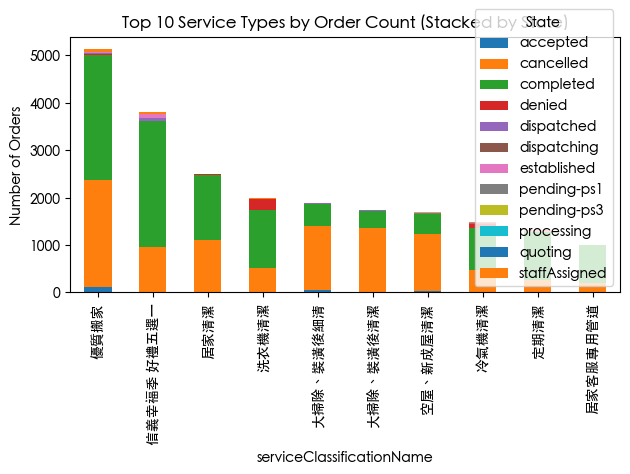

In [55]:
df = df_rsv_simpl

top_services = df['serviceClassificationName'].value_counts().nlargest(10).index

# Step 2: Filter DataFrame to include only top 10 services
df_top = df[df['serviceClassificationName'].isin(top_services)]

# Step 3: Group and pivot
grouped = df_top.groupby(['serviceClassificationName', 'state']).size().unstack(fill_value=0)
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]


# Step 4: Plot
grouped.plot(kind='bar', stacked=True)

# Step 5: Customize plot

plt.xlabel('serviceClassificationName')
plt.ylabel('Number of Orders')
plt.title('Top 10 Service Types by Order Count (Stacked by State)')
plt.legend(title='State')
plt.tight_layout()

plt.show()


In [73]:
# Count of each service
service_counts = df[['serviceClassificationName']].groupby('serviceClassificationName').size().reset_index(name='count')

# Median subtotal for each service
service_medians = df[['serviceClassificationName', 'subtotal']].groupby('serviceClassificationName').median().reset_index()

# Merge the two
services_summary = pd.merge(left=service_counts, right=service_medians, on='serviceClassificationName')
services_summary.rename(columns={'subtotal': 'subtotal_median'}, inplace=True)

service_mean = df[['serviceClassificationName', 'subtotal']].groupby('serviceClassificationName').mean().reset_index()
services_summary = pd.merge(left=services_summary, right=service_mean, on='serviceClassificationName')

services_summary.rename(columns={'subtotal': 'subtotal_mean'}, inplace=True)


services_summary.sort_values('count', ascending=False)

,serviceClassificationName,count,subtotal_median,subtotal_mean
12,優質搬家,5136,3000.0,5128.503310
9,信義幸福季 好禮五選一,3814,2500.0,2500.000000
23,居家清潔,2500,2200.0,2489.552000
37,洗衣機清潔,1983,1800.0,2314.755421
19,大掃除、裝潢後細清,1894,0.0,3471.411827
18,大掃除、裝潢後清潔,1740,0.0,2856.332184
40,空屋、新成屋清潔,1703,0.0,2730.747504
14,冷氣機清潔,1477,3900.0,4664.177387
20,定期清潔,1313,0.0,2446.046458
22,居家客服專用管道,997,3600.0,3284.834504


<Figure size 1000x600 with 0 Axes>

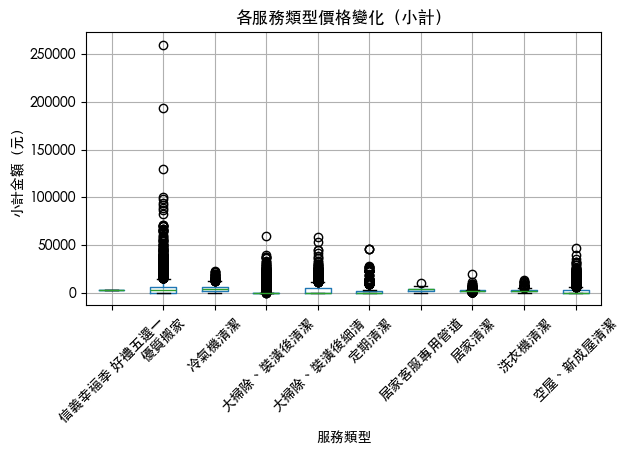

In [57]:
# Get top 10 services by number of orders (or subtotal sum if you prefer)
top_services = df['serviceClassificationName'].value_counts().nlargest(10).index
df_top = df[df['serviceClassificationName'].isin(top_services)]

# Box plot
plt.figure(figsize=(10, 6))
df_top.boxplot(column='subtotal', by='serviceClassificationName')

plt.title('各服務類型價格變化（小計）')
plt.suptitle('')  # Remove default "Boxplot grouped by ..."
plt.xlabel('服務類型')
plt.ylabel('小計金額（元）')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()